In [1]:
import requests
import json
import math
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from qgridnext import show_grid
from datetime import datetime, timedelta
import sys  
import os
import pandas_ta as ta
import sklearn as sk
import datetime as dt
from skopt.space import Integer, Real, Categorical

# Ensure the directories are in the system path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Data_Management'))) 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Strategies', 'Trend_Following')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Strategies', 'Mean_Reversion')))

# Import the modules
from data import Data
from sprtrnd_breakout import Sprtrnd_Breakout
from last_days_low import Last_Days_Low

# Specify the relative or absolute path to the CSV file
file_path = r"C:\Users\yassi\OneDrive\Documents\GitHub\Portfolio_1\Technical_Portfolio\Data_Management\all_data.csv"

# Read the CSV file
all_data = pd.read_csv(file_path, index_col=['date', 'coin'], parse_dates=['date'])
all_data

close      creturns         high  \
date                coin                                               
2017-08-17 05:00:00 BTCUSDT   4315.320000  1.506209e-03  4328.690000   
                    ETHUSDT    303.100006  4.940270e-03   303.279999   
2017-08-17 06:00:00 BTCUSDT   4324.350000  3.151810e-06  4345.450000   
2017-08-17 07:00:00 BTCUSDT   4349.990000  1.868776e-08  4349.990000   
                    ETHUSDT    307.959991  8.617874e-05   307.959991   
...                                   ...           ...          ...   
2024-12-27 23:00:00 SYSUSDT      0.112200  0.000000e+00     0.112400   
                    TRXUSDT      0.259400  0.000000e+00     0.259600   
                    VETUSDT      0.045760  0.000000e+00     0.045760   
                    WAXPUSDT     0.040910  0.000000e+00     0.040940   
                    XECUSDT      0.000035  0.000000e+00     0.000035   

                              log_return          low         open  \
date                coin                                             
2017-08-17 05:00:00 BTCUSDT    -6.498159  4291.370000  4308.830000   
                    ETHUSDT    -5.310335   300.000000   301.609985   
2017-08-17 06:00:00 BTCUSDT    -6.169374  4309.370000  4330.290000   
2017-08-17 07:00:00 BTCUSDT    -5.127863  4287.410000  4316.620000   
                    ETHUSDT    -4.048752   302.600006   302.679993   
...                                  ...          ...          ...   
2024-12-27 23:00:00 SYSUSDT    -5.632999     0.111100     0.111600   
                    TRXUSDT    -7.860292     0.258600     0.259400   
                    VETUSDT    -5.479996     0.045370     0.045580   
                    WAXPUSDT   -5.915972     0.040590     0.040770   
                    XECUSDT    -5.503282     0.000034     0.000034   

                                    price   returns        volume  \
date                coin                                            
2017-08-17 05:00:00 BTCUSDT   4315.320000  0.001506  2.323492e+01   
                    ETHUSDT    303.100006  0.004940  3.776725e+02   
2017-08-17 06:00:00 BTCUSDT   4324.350000  0.002093  7.229691e+00   
2017-08-17 07:00:00 BTCUSDT   4349.990000  0.005929  4.443249e+00   
                    ETHUSDT    307.959991  0.017444  7.547451e+02   
...                                   ...       ...           ...   
2024-12-27 23:00:00 SYSUSDT      0.112200  0.003578  7.290790e+05   
                    TRXUSDT      0.259400  0.000386  1.499596e+07   
                    VETUSDT      0.045760  0.004169  1.004372e+07   
                    WAXPUSDT     0.040910  0.002696  1.056349e+06   
                    XECUSDT      0.000035  0.004073  1.147830e+09   

                              volume_in_dollars  
date                coin                         
2017-08-17 05:00:00 BTCUSDT        1.002661e+05  
                    ETHUSDT        1.144725e+05  
2017-08-17 06:00:00 BTCUSDT        3.126371e+04  
2017-08-17 07:00:00 BTCUSDT        1.932809e+04  
                    ETHUSDT        2.324313e+05  
...                                         ...  
2024-12-27 23:00:00 SYSUSDT        8.180266e+04  
                    TRXUSDT        3.889953e+06  
                    VETUSDT        4.596008e+05  
                    WAXPUSDT       4.321524e+04  
                    XECUSDT        3.961160e+04  

[956964 rows x 10 columns]

In [44]:
start_time = dt.datetime(2024, 11, 1)
end_time = dt.datetime(2025, 1, 21)
timeframes = ['1w', '1d', '4h', '1h', '30m','15m', '5m', '1m']
index = 3 #It is better to choose the highest frequency for the backtest to be able to downsample
interval = timeframes[index]
symbols = ['BTCUSDT', 'ETHUSDT']
data = Data(symbols, interval, start_time, end_time).df
data

close  creturns       high  log_return  \
date                coin                                                  
2024-11-01 01:00:00 BTCUSDT   69402.01  0.989003   70360.00   -0.011058   
                    ETHUSDT    2501.51  0.990850    2530.79   -0.009192   
2024-11-01 02:00:00 BTCUSDT   69579.89  0.991538   69600.00    0.002560   
                    ETHUSDT    2510.01  0.994217    2512.63    0.003392   
2024-11-01 03:00:00 BTCUSDT   69369.99  0.988546   69714.45   -0.003021   
...                                ...       ...        ...         ...   
2025-01-20 21:00:00 ETHUSDT    3284.96  1.301175    3337.17   -0.010683   
2025-01-20 22:00:00 BTCUSDT  103608.00  1.476450  103815.98    0.009816   
                    ETHUSDT    3318.49  1.314456    3324.46    0.010155   
2025-01-20 23:00:00 BTCUSDT  102260.01  1.457241  103728.52   -0.013096   
                    ETHUSDT    3284.00  1.300795    3320.84   -0.010448   

                                   low       open      price   returns  \
date                coin                                                 
2024-11-01 01:00:00 BTCUSDT   69313.74   70173.72   69402.01 -0.010997   
                    ETHUSDT    2495.42    2524.60    2501.51 -0.009150   
2024-11-01 02:00:00 BTCUSDT   68830.00   69402.00   69579.89  0.002563   
                    ETHUSDT    2467.67    2501.50    2510.01  0.003398   
2024-11-01 03:00:00 BTCUSDT   69334.00   69579.89   69369.99 -0.003017   
...                                ...        ...        ...       ...   
2025-01-20 21:00:00 ETHUSDT    3279.76    3320.23    3284.96 -0.010626   
2025-01-20 22:00:00 BTCUSDT  101846.15  102596.00  103608.00  0.009864   
                    ETHUSDT    3255.92    3284.97    3318.49  0.010207   
2025-01-20 23:00:00 BTCUSDT  101701.01  103607.99  102260.01 -0.013010   
                    ETHUSDT    3260.93    3318.50    3284.00 -0.010393   

                                  volume  volume_in_dollars  
date                coin                                     
2024-11-01 01:00:00 BTCUSDT   2171.71390       1.507213e+08  
                    ETHUSDT  26614.17280       6.657562e+07  
2024-11-01 02:00:00 BTCUSDT   2802.10218       1.949700e+08  
                    ETHUSDT  40134.17530       1.007372e+08  
2024-11-01 03:00:00 BTCUSDT    921.81357       6.394620e+07  
...                                  ...                ...  
2025-01-20 21:00:00 ETHUSDT  16198.86240       5.321262e+07  
2025-01-20 22:00:00 BTCUSDT   1543.50015       1.599190e+08  
                    ETHUSDT  18165.72800       6.028279e+07  
2025-01-20 23:00:00 BTCUSDT   1816.99224       1.858056e+08  
                    ETHUSDT  20247.77190       6.649368e+07  

[3886 rows x 10 columns]

In [53]:
mr_strat_1 = Last_Days_Low(data, objective = 'multiple', train_size = 500, test_size = 500, step_size = 500)
tf_strat_1 = Sprtrnd_Breakout(data, objective = 'multiple', train_size = 500, test_size = 500, step_size = 500)

Performing Last Days Low Strategy
length of data: 3886
Data Head:                                 close  creturns      high  log_return  \
date                coin                                                
2024-11-01 01:00:00 BTCUSDT  69402.01  0.989003  70360.00   -0.011058   
                    ETHUSDT   2501.51  0.990850   2530.79   -0.009192   
2024-11-01 02:00:00 BTCUSDT  69579.89  0.991538  69600.00    0.002560   
                    ETHUSDT   2510.01  0.994217   2512.63    0.003392   
2024-11-01 03:00:00 BTCUSDT  69369.99  0.988546  69714.45   -0.003021   
                    ETHUSDT   2503.20  0.991519   2519.84   -0.002717   
2024-11-01 04:00:00 BTCUSDT  69592.00  0.991710  69623.99    0.003195   
                    ETHUSDT   2513.35  0.995540   2516.20    0.004047   
2024-11-01 05:00:00 BTCUSDT  69609.29  0.991957  69670.90    0.000248   
                    ETHUSDT   2510.29  0.994328   2515.00   -0.001218   
2024-11-01 06:00:00 BTCUSDT  69212.13  0.986297  69699.14 

<Axes: xlabel='date,coin'>

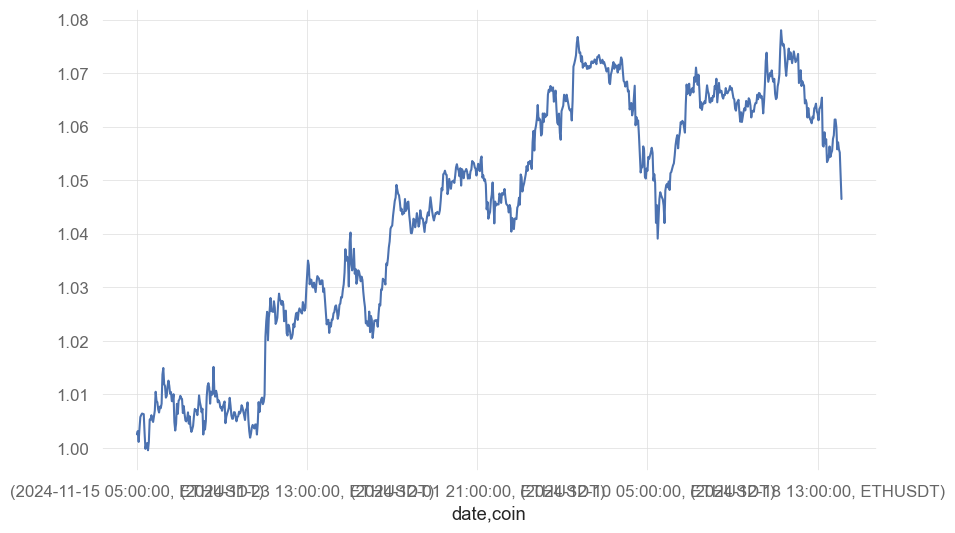

In [64]:
(mr_strat_1.trading_strategy(data).strategy * 1/4).cumsum().apply(np.exp).plot()

Performing Supertrend Breakout Strategy
length of data: 3886
Data Head:                                 close  creturns      high  log_return  \
date                coin                                                
2024-11-01 01:00:00 BTCUSDT  69402.01  0.989003  70360.00   -0.011058   
                    ETHUSDT   2501.51  0.990850   2530.79   -0.009192   
2024-11-01 02:00:00 BTCUSDT  69579.89  0.991538  69600.00    0.002560   
                    ETHUSDT   2510.01  0.994217   2512.63    0.003392   
2024-11-01 03:00:00 BTCUSDT  69369.99  0.988546  69714.45   -0.003021   
                    ETHUSDT   2503.20  0.991519   2519.84   -0.002717   
2024-11-01 04:00:00 BTCUSDT  69592.00  0.991710  69623.99    0.003195   
                    ETHUSDT   2513.35  0.995540   2516.20    0.004047   
2024-11-01 05:00:00 BTCUSDT  69609.29  0.991957  69670.90    0.000248   
                    ETHUSDT   2510.29  0.994328   2515.00   -0.001218   
2024-11-01 06:00:00 BTCUSDT  69212.13  0.986297  696

<Axes: xlabel='date,None'>

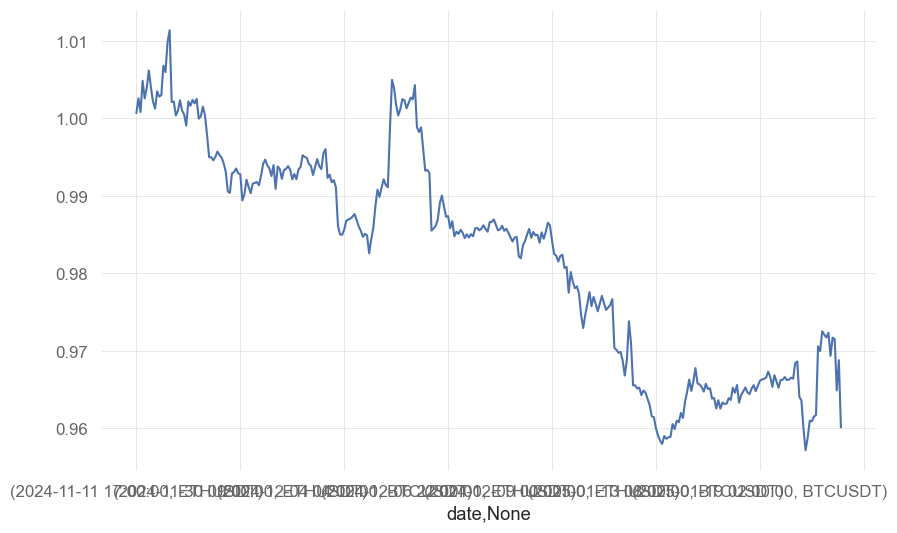

In [65]:
(tf_strat_1.trading_strategy(data).strategy * 1/4).cumsum().apply(np.exp).plot()

In [ ]:
mr_strat_1.test()

Train: 2024-11-01 01:00:00 - 2024-11-21 20:00:00
Test: 2024-11-21 21:00:00 - 2024-12-12 16:00:00
Performing Last Days Low Strategy
length of data: 1000
Data Head:                                 close  creturns      high  log_return  \
date                coin                                                
2024-11-01 01:00:00 BTCUSDT  69402.01  0.989003  70360.00   -0.011058   
                    ETHUSDT   2501.51  0.990850   2530.79   -0.009192   
2024-11-01 02:00:00 BTCUSDT  69579.89  0.991538  69600.00    0.002560   
                    ETHUSDT   2510.01  0.994217   2512.63    0.003392   
2024-11-01 03:00:00 BTCUSDT  69369.99  0.988546  69714.45   -0.003021   
                    ETHUSDT   2503.20  0.991519   2519.84   -0.002717   
2024-11-01 04:00:00 BTCUSDT  69592.00  0.991710  69623.99    0.003195   
                    ETHUSDT   2513.35  0.995540   2516.20    0.004047   
2024-11-01 05:00:00 BTCUSDT  69609.29  0.991957  69670.90    0.000248   
                    ETHUSDT   2510

In [57]:
tf_strat_1.test()

Train: 2024-11-01 01:00:00 - 2024-11-21 20:00:00
Test: 2024-11-21 21:00:00 - 2024-12-12 16:00:00
Performing Supertrend Breakout Strategy
length of data: 1000
Data Head:                                 close  creturns      high  log_return  \
date                coin                                                
2024-11-01 01:00:00 BTCUSDT  69402.01  0.989003  70360.00   -0.011058   
                    ETHUSDT   2501.51  0.990850   2530.79   -0.009192   
2024-11-01 02:00:00 BTCUSDT  69579.89  0.991538  69600.00    0.002560   
                    ETHUSDT   2510.01  0.994217   2512.63    0.003392   
2024-11-01 03:00:00 BTCUSDT  69369.99  0.988546  69714.45   -0.003021   
                    ETHUSDT   2503.20  0.991519   2519.84   -0.002717   
2024-11-01 04:00:00 BTCUSDT  69592.00  0.991710  69623.99    0.003195   
                    ETHUSDT   2513.35  0.995540   2516.20    0.004047   
2024-11-01 05:00:00 BTCUSDT  69609.29  0.991957  69670.90    0.000248   
                    ETHUSDT 

<Axes: xlabel='date,coin'>

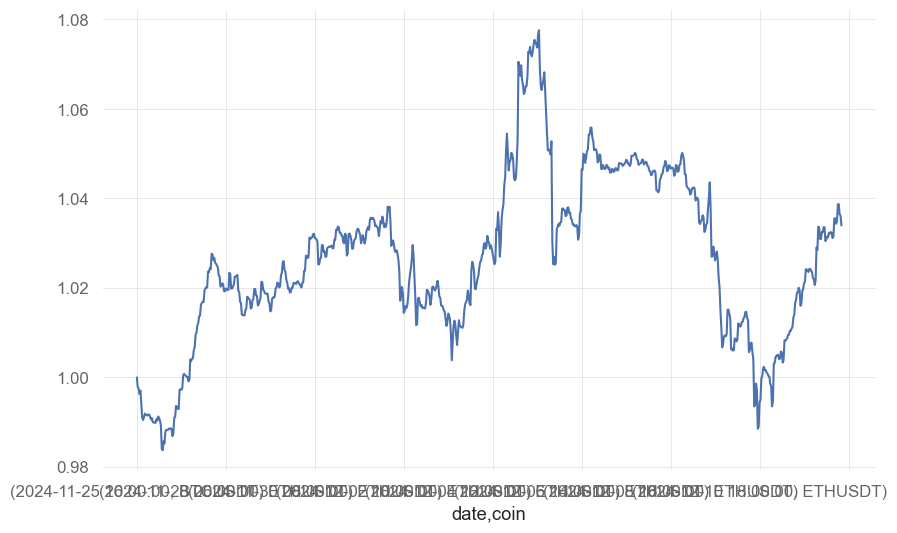

In [58]:
mr_strat_1.results.cstrategy.plot()

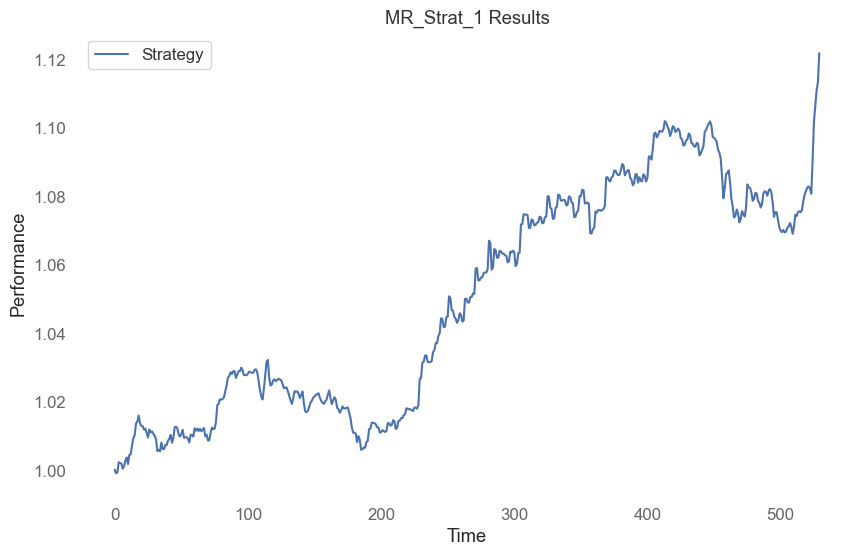

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(mr_strat_1.results.cstrategy.reset_index(drop=True), label='Strategy')
plt.xlabel('Time')
plt.ylabel('Performance')
plt.title('MR_Strat_1 Results')
plt.legend()
plt.grid()
plt.savefig("first_plot.png")
plt.show()

<Axes: xlabel='date,None'>

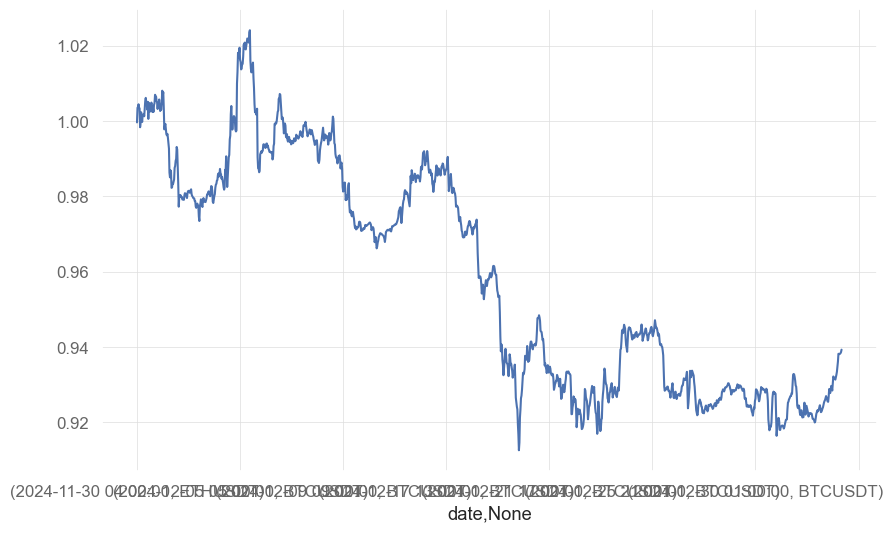

In [59]:
tf_strat_1.results.cstrategy.plot()

Train: 2020-01-01 01:00:00 - 2020-01-21 20:00:00
Test: 2020-01-21 21:00:00 - 2020-02-11 17:00:00
Performing Supertrend Breakout Strategy
length of data: 1000
Data Head:                                close  creturns     high  log_return      low  \
date                coin                                                       
2020-01-01 01:00:00 BTCUSDT  7216.27  1.005469  7230.00    0.005454  7175.71   
                    ETHUSDT   130.64  1.013735   130.65    0.013641   128.78   
2020-01-01 02:00:00 BTCUSDT  7242.85  1.009172  7244.87    0.003677  7211.41   
                    ETHUSDT   130.85  1.015364   130.98    0.001606   130.35   
2020-01-01 03:00:00 BTCUSDT  7225.01  1.006687  7245.00   -0.002466  7220.00   
                    ETHUSDT   130.20  1.010320   130.89   -0.004980   129.94   
2020-01-01 04:00:00 BTCUSDT  7217.27  1.005608  7230.00   -0.001072  7215.03   
                    ETHUSDT   130.20  1.010320   130.74    0.000000   130.15   
2020-01-01 05:00:00 BTCUSDT  72

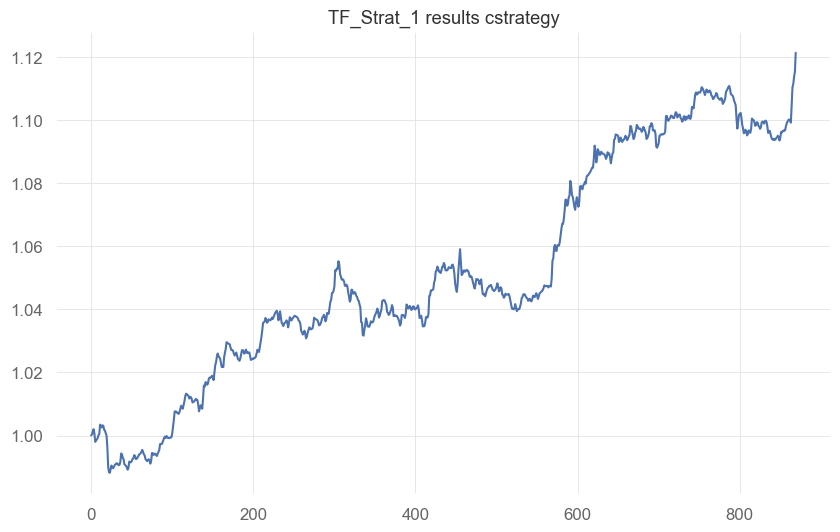

In [16]:
plt.figure()
plt.plot(tf_strat_1.results.cstrategy.reset_index(drop=True), label='Strategy')
plt.title('TF_Strat_1 results cstrategy')
plt.savefig("second_plot.png")

In [82]:
#Create a dummy results that represents holding cash where the value of the portfolio is constant
cash_df = pd.DataFrame(data = {'strategy': np.zeros(all_data.shape[0]), 'portfolio_value': np.ones(all_data.shape[0])}, index = all_data.index)
cash_df
strategy_map = {'mr_strat_1': mr_strat_1.results.strategy,
                'tf_strat_1': tf_strat_1.results.strategy}

In [83]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import quantstats_lumi as qs
from concurrent.futures import ThreadPoolExecutor, as_completed

class Portfolio_Optimization():
    def __init__(self, log_rets, 
                 train_size = 1000, 
                 test_size = 1000, 
                 step_size = 1000, 
                 objective = 'sharpe',
                 opt_freq = 'custom'):
        """
        This class performs a walk-forward optimization on a trading strategy.

        Parameters:
        data (pd.DataFrame): The historical data to be used for backtesting.
        trading_strategy (object): The trading strategy to be optimized.
        param_grid (dict): The grid of parameters to be optimized.
        train_size (int): The number of data points to be used for training.
        test_size (int): The number of data points to be used for testing.
        step_size (int): The number of data points to step forward in each iteration.
        optimize_fn (str): The optimization function to use ("grid" or "gp").
        objective (str): The objective function to maximize ("sharpe", "sortino", "calmar", "multiple").
        opt_period (str): The period to optimize over ['custom', 'daily', 'weekly', 'quarterly', 'semi-annually', 'yearly'].
        """
        self.log_rets = pd.concat(log_rets, axis = 1).fillna(0)
        if opt_freq == 'custom':
            self.train_size = train_size
        else:
            self.train_size = train_size = self.opt_freq(opt_freq)
        self.test_size = test_size
        self.step_size = step_size
        self.objective = objective
        
        
        if step_size + train_size + test_size > len(self.log_rets):
            raise ValueError("Invalid train, test, or step size.")
        elif train_size < 1 or test_size < 1 or step_size < 1:
            raise ValueError("Train, test, and step size must be greater than 0.")
        elif step_size < test_size:
            raise ValueError("Step size must be greater than test size.")
       
        
                            
    #### Helper Methods ####
    def split_data(self, data, train_size, test_size, step_size):
        data = data.unstack()
        start = 0
        while start + train_size + test_size <= len(data):
            train = data.iloc[start:start + train_size].stack(future_stack = True)
            test = data.iloc[start + train_size:start + train_size + test_size].stack(future_stack = True)
            yield train, test
            start += step_size
            
    def calculate_returns(self, weights, log_rets):
        return np.dot(weights, log_rets.T)
    
    def bounds(self, N):
        # Initialize an empty list to collect the inner tuples
        collected_tuples = []
            
        # Iterate n times to create n inner tuples
        for _ in range(N):
            # Append the specific numbers as a tuple to the list
            collected_tuples.append((0, 1))
            
            # Convert the list of tuples to a tuple of tuples and return it
        return tuple(collected_tuples)
            

    def objective_function(self, weights, train_data):
        """
        Calculate the objective function for the optimization.

        Note that we have only included objective functions that we want to maximize.
        """

        strategy_combined = pd.DataFrame(self.calculate_returns(weights, train_data))[0]

        if strategy_combined.sum() == 0:
            return 0

        try:
            if self.objective == "multiple":
                creturns = strategy_combined.cumsum().apply(np.exp)
                performance = creturns.iloc[-1]
            elif self.objective == "sharpe":
                performance = qs.stats.sharpe(strategy_combined)
            elif self.objective == "sortino":
                performance = qs.stats.sortino(strategy_combined)
            elif self.objective == "calmar": 
                performance = qs.stats.calmar(strategy_combined)
            else:
                raise ValueError("Invalid objective function")
        except Exception as e:
            print(f"Error calculating performance: {e}")
            performance = 0

        return performance
    
    def opt_freq(self, opt_freq):
        time_diff = self.data.unstack().index.get_level_values(0)[1] - self.data.unstack().index.get_level_values(0)[0]

        if opt_freq == 'daily':
            return pd.Timedelta('1 day') // time_diff
        elif opt_freq == 'weekly':
            return pd.Timedelta('1 w') // time_diff
        elif opt_freq == 'monthly':
            return pd.Timedelta('1 m') // time_diff
        elif opt_freq == 'quarterly':
            return pd.Timedelta('3 m') // time_diff
        elif opt_freq == 'semi-annually':
            return pd.Timedelta('6 m') // time_diff
        elif opt_freq == 'yearly':
            return pd.Timedelta('1 y') // time_diff
        else:
            raise ValueError("Invalid optimization frequency")
        


    #### Optimization Methods ####
    
    def optimize_weights_minimize(self, train_data):
        """
        Optimize the weights of a trading strategy using Bayesian optimization.
        """
        equal_weights = np.array([1 / len(self.log_rets.columns)] * len(self.log_rets.columns))
        bounds = self.bounds(len(self.log_rets.columns))
        
        sum_constraint = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
        starting_guess = equal_weights
        
        # Call the minimize function
        result = minimize(
        fun=lambda weights: -self.objective_function(weights, train_data),  # Minimize negative performance
        x0=starting_guess,  # Starting point for optimization
        bounds=bounds,  # Bounds for each weight
        constraints=sum_constraint  # Constraint: weights sum to 1
        )
        
        return result.x

   
    def test_weights(self, weights, test_data):
        
        result = self.calculate_returns(weights, test_data)
        peformance = self.objective_function(weights, test_data)
        return peformance, result


    # def walk_forward_optimization(self):
    #     """
    #     Perform a walk-forward optimization on a dataset.
    #     """
    #     all_performance = []
    #     all_results = []
    #     for train, test in self.split_data(self.log_rets, self.train_size, self.test_size, self.step_size):
    #         # Optimize on training data    
    #         weights = self.optimize_weights_minimize(train)
            
    #         # Test on out-of-sample data
    #         performance, result = self.test_weights(test, weights)
    #         print(f"Out-of-sample performance: {performance}")
            
    #         all_performance.append(performance)
    #         all_results.append(pd.DataFrame(result))
        
    #     all_results = pd.concat(all_results).reset_index(drop = True)
    #     return all_performance, all_results
    

    def walk_forward_optimization(self):
        """
        Perform a walk-forward optimization on a dataset using ThreadPoolExecutor for parallelism.
        """
        all_performance = []
        all_results = []

        def process_walk_forward(train, test):
            """
            Optimize weights on training data and test on out-of-sample data.
            """
            weights = self.optimize_weights_minimize(train)
            performance, result = self.test_weights(test, weights)
            print(f"Out-of-sample performance: {performance}")
            return performance, pd.DataFrame(result)

        # Use ThreadPoolExecutor to process tasks concurrently
        with ThreadPoolExecutor() as executor:
            futures = [
                executor.submit(process_walk_forward, train, test)
                for train, test in self.split_data(self.log_rets, self.train_size, self.test_size, self.step_size)
            ]

            # Collect results as they complete
            for future in as_completed(futures):
                performance, result = future.result()
                all_performance.append(performance)
                all_results.append(result)

        # Combine all results into a single DataFrame and return
        all_results = pd.concat(all_results).reset_index(drop=True)
        return all_performance, all_results

In [84]:
wfo = Portfolio_Optimization(strategy_map, train_size = 500, test_size = 500, step_size = 500, objective = 'multiple')
all_performance, all_results = wfo.walk_forward_optimization()
print(all_results)
creturns = all_results.cumsum().apply(np.exp)

ValueError: No objects to concatenate

In [85]:
best_weights_backtest = wfo.optimize_weights_minimize(pd.concat(strategy_map, axis = 1).fillna(0))

In [87]:
best_weights_backtest

array([1.00000000e+00, 5.55111512e-17])

<Axes: >

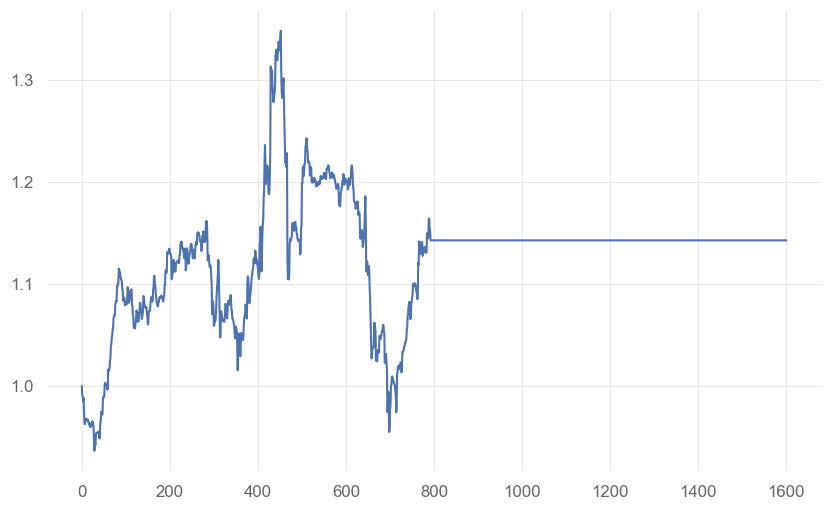

In [86]:
pd.Series(np.dot(best_weights_backtest, pd.concat(strategy_map, axis = 1).fillna(0).T)).cumsum().apply(np.exp).plot()

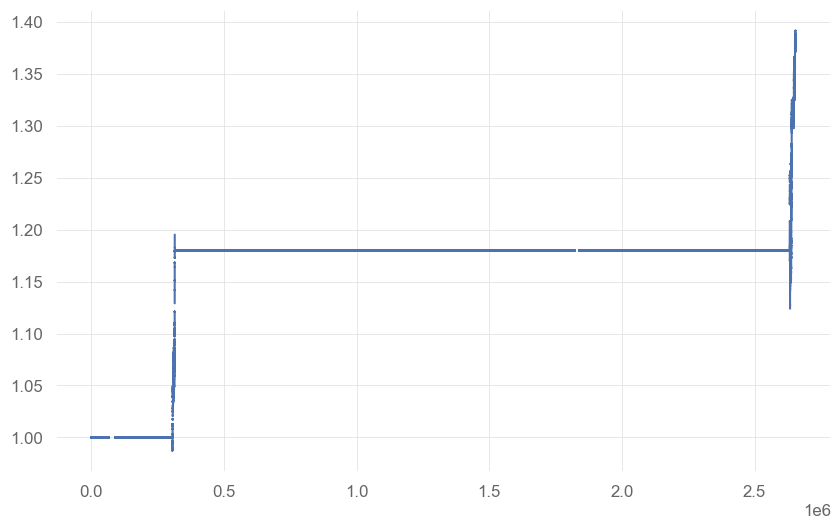

In [69]:
import pickle
plt.figure()
plt.plot(creturns)

In [36]:
with open("variables.pkl", "wb") as f:  # Use 'wb' mode for writing in binary
    pickle.dump((mr_strat_1.results, tf_strat_1.results, strategy_map, log_rets, all_performance, all_results), f)